In [26]:
import pandas as pd
import numpy as np
from pandas_datareader import data

In [7]:
pd.set_option('max_colwidth', 1000)
pd.set_option('display.width', 1000)

In [2]:
start_date = '2014-01-01'
end_date = '2018-01-01'

In [3]:
google_data = data.DataReader('GOOG', 'yahoo', start_date, end_date)

In [10]:
google_data

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2014-01-02,556.788025,552.060730,555.647278,554.481689,3656400.0,554.481689
2014-01-03,556.379578,550.401978,555.418152,550.436829,3345800.0,550.436829
2014-01-06,557.340942,551.154114,554.426880,556.573853,3551800.0,556.573853
2014-01-07,567.717041,558.486633,560.399475,567.303589,5124300.0,567.303589
2014-01-08,571.517822,564.528992,570.860291,568.484192,4501700.0,568.484192
...,...,...,...,...,...,...
2017-12-22,1064.199951,1059.439941,1061.109985,1060.119995,755100.0,1060.119995
2017-12-26,1060.119995,1050.199951,1058.069946,1056.739990,760600.0,1056.739990
2017-12-27,1058.369995,1048.050049,1057.390015,1049.369995,1271900.0,1049.369995


In [23]:
google_data_signal = pd.DataFrame(google_data.index)
google_data_signal['price'] = google_data['Adj Close'].values

In [24]:
google_data_signal['daily_difference'] = google_data_signal['price'].diff()

In [25]:
google_data_signal.head()

,Date,price,daily_difference
0,2014-01-02,554.481689,NaN
1,2014-01-03,550.436829,-4.044861
2,2014-01-06,556.573853,6.137024
3,2014-01-07,567.303589,10.729736
4,2014-01-08,568.484192,1.180603


In [27]:
google_data_signal['signal'] = 0
google_data_signal['signal'] = np.where(google_data_signal['daily_difference']>0, 1, 0)

In [30]:
google_data_signal['positions'] = google_data_signal['signal'].diff()

In [32]:
google_data_signal.head(10)

,Date,price,daily_difference,signal,positions
0,2014-01-02,554.481689,NaN,0,NaN
1,2014-01-03,550.436829,-4.044861,0,0.0
2,2014-01-06,556.573853,6.137024,1,1.0
3,2014-01-07,567.303589,10.729736,1,0.0
4,2014-01-08,568.484192,1.180603,1,0.0
5,2014-01-09,563.009705,-5.474487,0,-1.0
6,2014-01-10,562.979797,-0.029907,0,0.0
7,2014-01-13,559.393250,-3.586548,0,0.0
8,2014-01-14,572.553955,13.160706,1,1.0
9,2014-01-15,572.165405,-0.388550,0,-1.0


In [33]:
import matplotlib.pyplot as plt

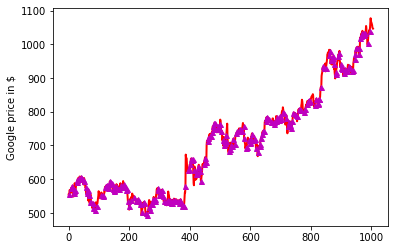

In [38]:
fig = plt.figure()
ax1 = fig.add_subplot(111, ylabel="Google price in $")
google_data_signal['price'].plot(ax=ax1, color='r', lw=2.)
ax1.plot(google_data_signal.loc[google_data_signal['positions'] == 1.0].index, google_data_signal['price'][google_data_signal['positions'] == 1.0], '^', markersize=5, color='m')